<a href="https://colab.research.google.com/github/Jamolkhon5/TestPriject/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Conv2D, UpSampling2D, InputLayer
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from skimage.color import rgb2lab, lab2rgb
from skimage.io import imsave 
import numpy as np
from google.colab import files

from PIL import Image
import matplotlib.pyplot as plt
from io import * 

In [5]:
upl = files.upload()
names = list(upl.keys())
img = Image.open(BytesIO(upl[names[0]]))

Saving 131313.png to 131313 (1).png


In [6]:
def processed_image(img):
  image = img.resize((256,256),Image.BILINEAR)
  image = np.array(image, dtype = float)
  size = image.shape
  lab = rgb2lab(1.0/255*image)
  X,Y = lab[:,:,0], lab[:,:,1:]

  Y /=128
  X = X.reshape(1,size[0],size[1],1)
  Y = Y.reshape(1,size[0],size[1],2)
  return X, Y, size

In [7]:
X, Y, size = processed_image(img)

In [8]:
model = Sequential()
model.add(InputLayer(input_shape=(None,None,1)))

model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',padding='same', strides=2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',padding='same', strides=2))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same', strides=2))

model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(Conv2D(2,(3,3),activation='tanh',padding='same'))
model.add(UpSampling2D((2,2)))



In [9]:
model.compile(optimizer='adam', loss = 'mse')
model.fit(x=X, y=Y, batch_size=1, epochs=50)

Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 0.1451
Epoch 2/50
1/1 [==============================] - 2s 2s/step - loss: 1.2501
Epoch 3/50
1/1 [==============================] - 1s 1s/step - loss: 1.1121
Epoch 4/50
1/1 [==============================] - 1s 924ms/step - loss: 1.1133
Epoch 5/50
1/1 [==============================] - 1s 925ms/step - loss: 1.1124
Epoch 6/50
1/1 [==============================] - 1s 923ms/step - loss: 1.1121
Epoch 7/50
1/1 [==============================] - 1s 937ms/step - loss: 1.1104
Epoch 8/50
1/1 [==============================] - 1s 922ms/step - loss: 1.0537
Epoch 9/50
1/1 [==============================] - 1s 939ms/step - loss: 0.1966
Epoch 10/50
1/1 [==============================] - 1s 931ms/step - loss: 0.1584
Epoch 11/50
1/1 [==============================] - 1s 930ms/step - loss: 0.1588
Epoch 12/50
1/1 [==============================] - 1s 914ms/step - loss: 0.1474
Epoch 13/50
1/1 [==============================] - 1s 911m

In [10]:
upl = files.upload()

Saving 123.jpg to 123.jpg


In [11]:
names = list(upl.keys())
img = Image.open(BytesIO(upl[names[0]]))
X,Y,size = processed_image(img)

1/1 [==============================] - 0s 404ms/step


/usr/local/lib/python3.8/dist-packages/skimage/color/colorconv.py:1109: UserWarning: Color data out of range: Z < 0 in 640 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


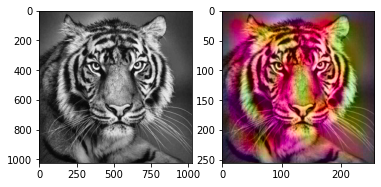

In [12]:
output = model.predict(X)
output *= 128
min_vals, max_vals = -128, 127
ab = np.clip(output[0], min_vals, max_vals)

cur = np.zeros((size[0],size[1],3))
cur[:,:,0] = np.clip(X[0][:,:,0], 0, 100)
cur[:,:,1:] = ab
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(lab2rgb(cur))
